In [4]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_bloch_multivector
# from iqx import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
# provider = IBMQ.load_account()

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(1,0)
qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤└─┬─┘
q_1: ┤ H ├──■──
     └───┘

In [6]:
def printUnitaryMatrix(inputCircuit, matrixText="Unitary Matrix"):
    tmp_unitary_backend = Aer.get_backend('unitary_simulator')
    display(inputCircuit.draw())
    inPreText = "\\text{" + matrixText + "} = "
    array_to_latex(execute(inputCircuit,tmp_unitary_backend).result().get_unitary(inputCircuit, decimals=1), pretext=inPreText, precision=1)

In [7]:
def printStateVector(inputCircuit, stateVectorText="Statevector"):
    tmp_statevector_backend = Aer.get_backend('statevector_simulator')
    final_statevector = execute(inputCircuit,statevector_backend).result().get_statevector()
    inPreText = "\\text{" + stateVectorText + "} = "
    array_to_latex(final_statevector, pretext=inPreText, precision=1)

In [8]:
def printAll(inputCircuit, vectorAndMatrixText="Statevector"):
    printStateVector(inputCircuit, vectorAndMatrixText)
    printUnitaryMatrix(inputCircuit, vectorAndMatrixText)

<IPython.core.display.Math object>

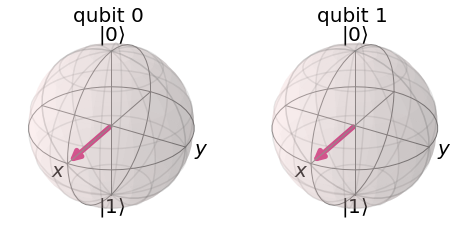

In [9]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [10]:
unitary_backend = Aer.get_backend('unitary_simulator')
array_to_latex(execute(qc,unitary_backend).result().get_unitary(qc, decimals=1), pretext="\\text{Unitary Matrix} = ", precision=1)

<IPython.core.display.Math object>

In [11]:
cnotQc = QuantumCircuit(2)
cnotQc.cx(0,1)
printAll(cnotQc, "CNOT")

<IPython.core.display.Math object>

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

<IPython.core.display.Math object>

In [12]:
testQc = QuantumCircuit(2)
testQc.h(0)
testQc.h(1)

In [13]:
printAll(testQc)

<IPython.core.display.Math object>

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

<IPython.core.display.Math object>

In [14]:
testQc2 = QuantumCircuit(2)
testQc2.h(0)
testQc2.h(1)
testQc2.cx(0,1)
printAll(testQc2)

<IPython.core.display.Math object>

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Math object>

In [15]:
testQc3 = QuantumCircuit.copy(testQc2)
testQc3.h(0)
testQc3.h(1)
printAll(testQc3, "H CNOT H = INVERSE CNOT")

<IPython.core.display.Math object>

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Math object>

In [16]:
inverseCnotQc = QuantumCircuit(2)
inverseCnotQc.cx(1,0)
printAll(inverseCnotQc, "INVERSE CNOT")

<IPython.core.display.Math object>

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

<IPython.core.display.Math object>

In [17]:
qcPlusPlus = QuantumCircuit(2)
qcPlusPlus = qcPlusPlus.combine(testQc)
printAll(qcPlusPlus, "|++>")

<IPython.core.display.Math object>

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

<IPython.core.display.Math object>

In [18]:
qcPlusMinus = QuantumCircuit(2)
qcPlusMinus.x(0)
qcPlusMinus = qcPlusMinus.combine(testQc)
printAll(qcPlusMinus, "|+->")

<IPython.core.display.Math object>

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

<IPython.core.display.Math object>

In [19]:
qcMinusPlus = QuantumCircuit(2)
qcMinusPlus.x(1)
qcMinusPlus = qcMinusPlus.combine(testQc)
printAll(qcMinusPlus, "|-+>")

<IPython.core.display.Math object>

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Math object>

In [20]:
qcMinusMinus = QuantumCircuit(2)
qcMinusMinus.x(0)
qcMinusMinus.x(1)
qcMinusMinus = qcMinusMinus.combine(testQc)
printAll(qcMinusMinus, "|-->")

<IPython.core.display.Math object>

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤├───┤
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Math object>

In [21]:
testQc4 = QuantumCircuit(2)
testQc4 = testQc4.combine(qcPlusPlus)
testQc4.cx(0,1)
printAll(testQc4, "CNOT|++> = |++>")

<IPython.core.display.Math object>

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Math object>

In [22]:
testQc5 = QuantumCircuit(2)
testQc5 = testQc5.combine(qcPlusMinus)
testQc5.cx(0,1)
printAll(testQc5, "CNOT|+-> = |+->")

<IPython.core.display.Math object>

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ H ├─────┤ X ├
     └───┘     └───┘

<IPython.core.display.Math object>

In [23]:
testQc6 = QuantumCircuit(2)
testQc6 = testQc6.combine(qcMinusPlus)
testQc6.cx(0,1)
printAll(testQc6, "CNOT|-+> = |--> PHASE KICK BACK")

<IPython.core.display.Math object>

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Math object>

In [24]:
testQc7 = QuantumCircuit(2)
testQc7 = testQc7.combine(qcMinusMinus)
testQc7.cx(0,1)
printAll(testQc7, "CNOT|--> = |-+>")

<IPython.core.display.Math object>

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤├───┤┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Math object>

In [25]:
from math import pi
qt = QuantumCircuit(2)
qt.cp(pi/4, 0, 1)
printAll(qt, "Controlled-T")

<IPython.core.display.Math object>

q_0: ────■─────
     ┌───┴────┐
q_1: ┤ P(π/4) ├
     └────────┘

<IPython.core.display.Math object>

<IPython.core.display.Math object>

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

<IPython.core.display.Math object>

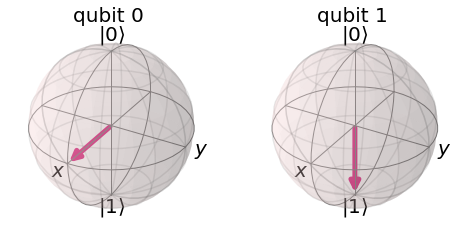

In [26]:
qt_base = QuantumCircuit(2)
qt_base.h(0)
qt_base.x(1)
printAll(qt_base, "base")
final_state = execute(qt_base,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

┌───┐          
q_0: ┤ H ├────■─────
     ├───┤┌───┴────┐
q_1: ┤ X ├┤ P(π/4) ├
     └───┘└────────┘

<IPython.core.display.Math object>

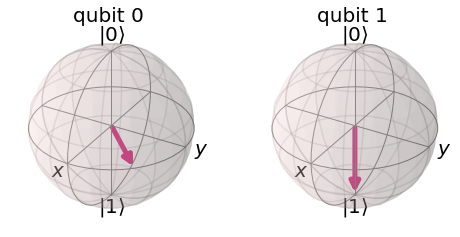

In [27]:
qct = QuantumCircuit(2)
qct = qct.combine(qt_base)
qct.cp(pi/4,0,1)
printAll(qct, "Controlled T")
final_state = execute(qct,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ X ├─■─
     └───┘

<IPython.core.display.Math object>

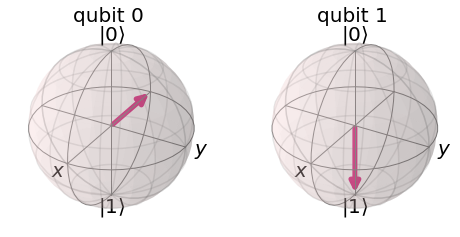

In [28]:
qcz = QuantumCircuit(2)
qcz = qcz.combine(qt_base)
qcz.cz(0,1)
printAll(qcz, "Controlled Z [0,1]")
final_state = execute(qcz,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ X ├─■─
     └───┘

<IPython.core.display.Math object>

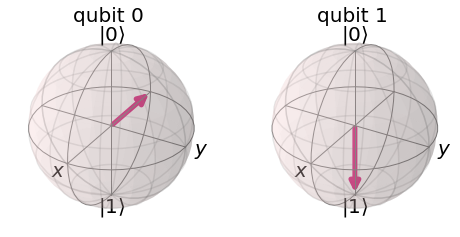

In [29]:
qcz2 = QuantumCircuit(2)
qcz2 = qcz2.combine(qt_base)
qcz2.cz(1,0)
printAll(qcz2, "Controlled Z [1,0]")
final_state = execute(qcz,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)